# ML_CA2: Income Prediction and Sentiment Analysis


In [1]:
# Import libraries
import pandas as pd

# Load dataset
file_path = r"C:\Users\Administrator\Desktop\ML-CA2\BankRecords.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

To understand the structure and contents of the dataset, I display the first five rows using `head()` and summarize the data types and non-null counts using `info()`. This provides a quick overview of overall shape.


In [4]:
# Check basic statistics of numeric features
print("\n🔹 Statistical Summary of Numeric Columns")
display(df.describe())


🔹 Statistical Summary of Numeric Columns


,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


####  Checking Missing Values

In [5]:
# Check for missing values in each column
missing_summary = df.isnull().sum()
# Only display columns that actually have missing values (i.e., > 0)
print("Missing Values per Column:\n", missing_summary[missing_summary > 0])


Missing Values per Column:
 Series([], dtype: int64)


I used `isnull().sum()` to count missing values in each column. This ensures the dataset is complete before further processing.


#### Checking Duplicates Rows

In [6]:
# Detect duplicate rows
duplicates = df.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicates}")



Total Duplicate Rows: 0


I checked for duplicate records to avoid redundancy.

#### Exploring Categorical Features


In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Display unique value counts for each categorical feature
for col in categorical_cols:
    print(f"\n🔹 Unique values in '{col}':")
    print(df[col].value_counts())



🔹 Unique values in 'Education':
Education
Diploma    2096
Masters    1501
Degree     1403
Name: count, dtype: int64

🔹 Unique values in 'Personal Loan':
Personal Loan
No     4520
Yes     480
Name: count, dtype: int64

🔹 Unique values in 'Securities Account':
Securities Account
No     4478
Yes     522
Name: count, dtype: int64

🔹 Unique values in 'CD Account':
CD Account
No     4698
Yes     302
Name: count, dtype: int64

🔹 Unique values in 'Online Banking':
Online Banking
Yes    2984
No     2016
Name: count, dtype: int64

🔹 Unique values in 'CreditCard':
CreditCard
No     3530
Yes    1470
Name: count, dtype: int64


I explore the unique values in all categorical columns to understand possible categories and detect any data inconsistencies or imbalances.
Most categorical features are binary (Yes/No), such as 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', and 'CreditCard'.  
The 'Education' column contains three levels — Diploma, Masters, and Degree — and may be encoded.
This step ensures that the data is clean, consistent, and ready for appropriate encoding strategies.


## Part 1- Neural Networks

#### Distribution of Customer Income

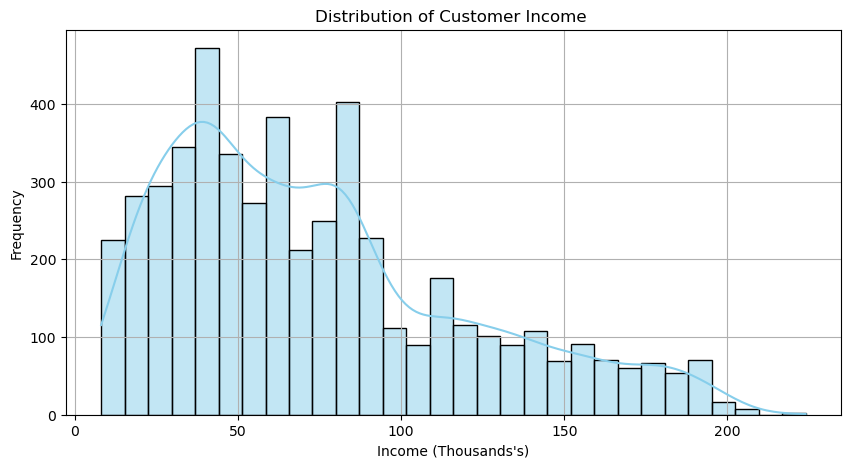

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the income column
plt.figure(figsize=(10, 5))

# Histogram with KDE (smoothed curve)
sns.histplot(df["Income(Thousands's)"], kde=True, bins=30, color="skyblue")

# Add plot titles and labels
plt.title("Distribution of Customer Income ")
plt.xlabel("Income (Thousands's)")
plt.ylabel("Frequency")

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


I visualize the distribution of the target variable `Income(Thousands's)` using a histogram with a KDE (Kernel Density Estimate) curve. This helps to understand the spread, skewness, and possible outliers in the income data.
The distribution appears to be right-skewed, with a high concentration of customers earning between $20k and $80k, and fewer customers in the higher income ranges.


#### Income Distribution by Experience


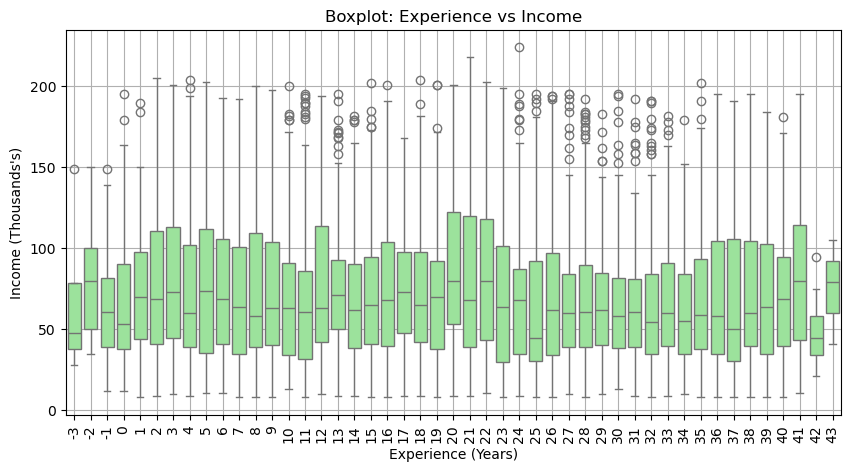

In [10]:
# Boxplot: Income distribution by Experience (Years)
plt.figure(figsize=(10, 5))

# Show boxplot
sns.boxplot(x=df["Experience(Years)"], y=df["Income(Thousands's)"], color='lightgreen')

# Title and labels
plt.title("Boxplot: Experience vs Income")
plt.xlabel("Experience (Years)")
plt.ylabel("Income (Thousands's)")

# Fix overlapping x-axis labels
plt.xticks(rotation=90)

# Add grid for readability
plt.grid(True)

# Show plot
plt.show()


This boxplot visualizes the distribution of customer income across different experience levels. It helps identify how income varies with experience and highlights outliers or irregularities.
From the plot, we can observe that income distribution varies widely within experience groups, and some low or negative experience values may indicate data entry issues.


In [11]:
# Fix negative experience values by converting them to absolute values
# This corrects invalid data entries like -2 or -3 years of experience
df['Experience(Years)'] = df['Experience(Years)'].apply(lambda x: abs(x))


The boxplot visualization of Experience vs Income, we observed invalid negative values in the 'Experience(Years)' column.  
Since experience cannot be negative, I corrected this by converting all values to their absolute equivalents.


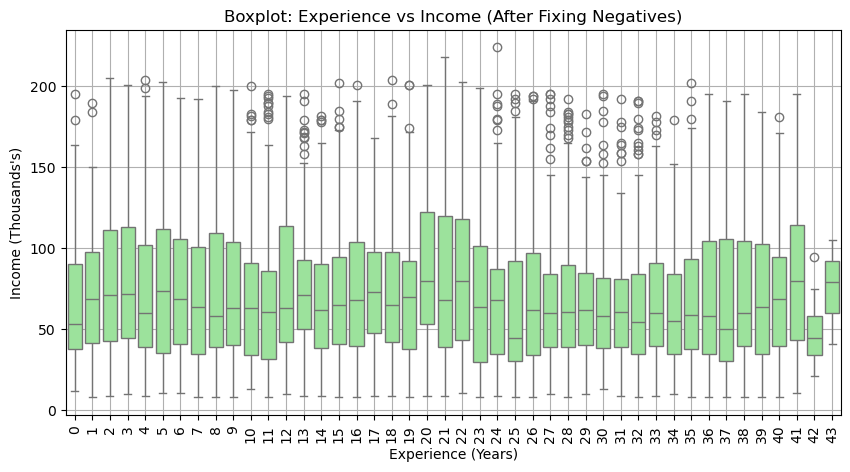

In [12]:
# Replot the boxplot after fixing negative experience values
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Experience(Years)"], y=df["Income(Thousands's)"], color='lightgreen')
plt.title("Boxplot: Experience vs Income (After Fixing Negatives)")
plt.xlabel("Experience (Years)")
plt.ylabel("Income (Thousands's)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


After converting negative experience values to positive, I replot the boxplot to confirm that the data correction has taken effect.  
The updated plot now reflects only valid (positive) experience values and gives a clearer view of income distribution across experience levels.


##### Visualizing the Relationship Between Credit Score and Income


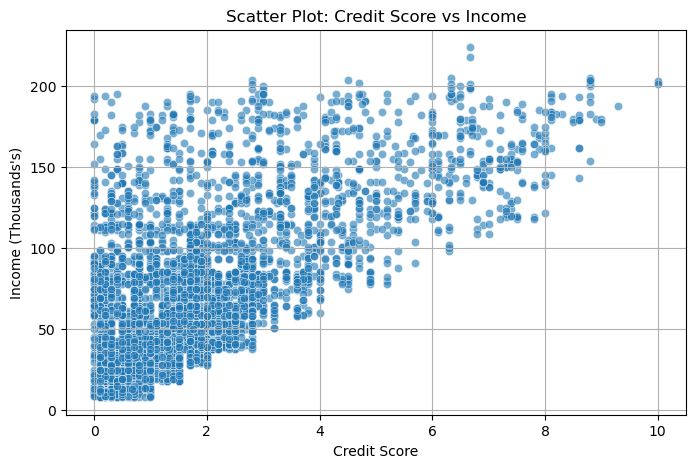

In [14]:
# Scatter plot: Credit Score vs Income
plt.figure(figsize=(8, 5))

# Plot each data point as a semi-transparent dot
sns.scatterplot(x=df["Credit Score"], y=df["Income(Thousands's)"], alpha=0.6)

# Add plot title and axis labels
plt.title("Scatter Plot: Credit Score vs Income")
plt.xlabel("Credit Score")
plt.ylabel("Income (Thousands's)")

# Show gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()


#### Compare income distribution across education levels

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9872\1489061803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y="Income(Thousands's)", data=df, palette='pastel')


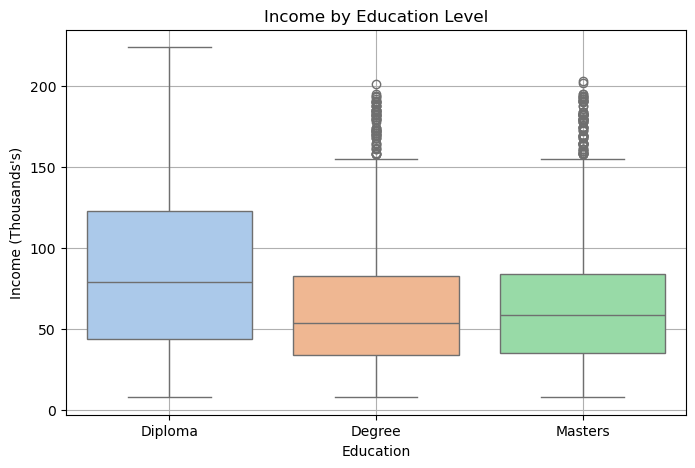

In [15]:
# Boxplot to compare income distribution across education levels
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y="Income(Thousands's)", data=df, palette='pastel')
plt.title("Income by Education Level")
plt.xlabel("Education")
plt.ylabel("Income (Thousands's)")
plt.grid(True)
plt.show()


This boxplot compares the distribution of income across different education levels: Diploma, Degree, and Masters.  
Interestingly, customers with a Diploma appear to have a wider income range and higher median income compared to those with a Degree or Masters. This may indicate that formal education level is not strongly correlated with income in this dataset.


#### Income Distribution Based on Personal Loan Status


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9872\1278953504.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personal Loan', y="Income(Thousands's)", data=df, jitter=True, palette='coolwarm')


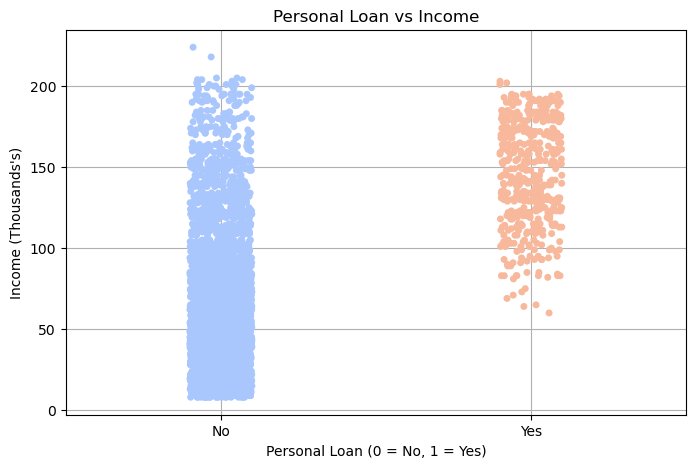

In [16]:
# Income distribution by Personal Loan status
plt.figure(figsize=(8, 5))

# Plot income values for 'Yes' and 'No' loan categories with jitter to spread points
sns.stripplot(x='Personal Loan', y="Income(Thousands's)", data=df, jitter=True, palette='coolwarm')

# Set plot title and labels
plt.title("Personal Loan vs Income")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Income (Thousands's)")

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()


This strip plot compares customer income based on whether they have a personal loan. It can be seen that customers who have taken a personal loan generally belong to higher income brackets, while those without a loan are spread across a wider income range.


#### Correlation Heatmap

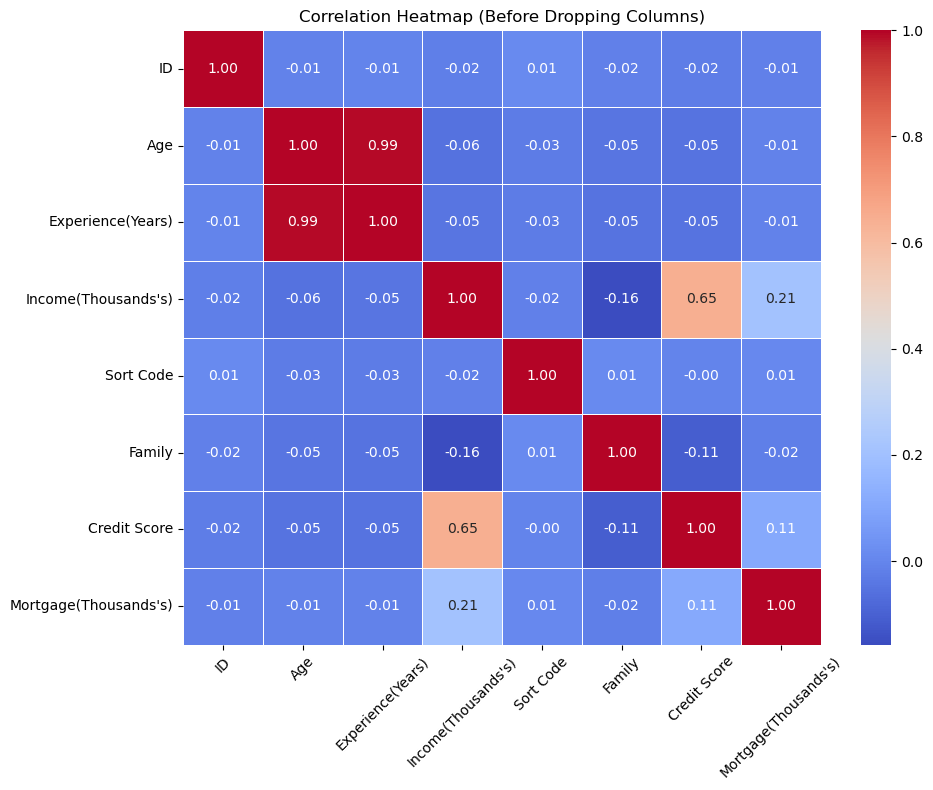

In [18]:
# Compute the correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Before Dropping Columns)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The heatmap shows that `Credit Score` has a strong positive correlation (0.65) with income, while `ID` and `Sort Code` have no meaningful correlation. 

In [19]:
# Drop columns that are not useful for prediction
# 'ID' is just a unique identifier, and 'Sort Code' is unrelated to income behavior
df.drop(['ID', 'Sort Code'], axis=1, inplace=True)


I dropped the `ID` and `Sort Code` columns because they do not contribute to income prediction. `ID` is a unique identifier, and `Sort Code` is a banking detail with no predictive value in the context of customer behavior or financial attributes.


In [20]:
df.head()

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,25,1,49,4,1.6,Diploma,0,No,Yes,No,No,No
1,45,19,34,3,1.5,Diploma,0,No,Yes,No,No,No
2,39,15,11,1,1.0,Diploma,0,No,No,No,No,No
3,35,9,100,1,2.7,Degree,0,No,No,No,No,No
4,35,8,45,4,1.0,Degree,0,No,No,No,No,Yes


#### Encode Binary Categorical Variables


In [21]:
# Define binary columns to encode
binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

# Replace 'Yes' with 1 and 'No' with 0
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9872\1601126403.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


Machine learning models require all input features to be numerical. Binary categorical variables such as `"Yes"` and `"No"` cannot be directly processed by algorithms like Linear Regression or Random Forest. Therefore, these values were encoded as `1` (Yes) and `0` (No) to ensure compatibility with modeling processes and enable the algorithms to learn from these features effectively.

#### One-Hot Encoding for Multiclass Categorical Variable ('Education')

In [22]:
# One-hot encoding for 'Education'
df = pd.get_dummies(df, columns=['Education'], drop_first=True)  # drops 'Diploma'


The `Education` column contained three categories: Degree, Diploma, and Masters. One-hot encoding was applied to convert these categorical values into numeric format, and `drop_first=True` was used to avoid multicollinearity.

As a result, two dummy variables were created: `Education_Diploma` and `Education_Masters`. The **Degree** category was dropped and now serves as the baseline. This ensures that the model can interpret education levels correctly while avoiding redundant information.


In [23]:
df.head()

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Education_Diploma,Education_Masters
0,25,1,49,4,1.6,0,0,1,0,0,0,True,False
1,45,19,34,3,1.5,0,0,1,0,0,0,True,False
2,39,15,11,1,1.0,0,0,0,0,0,0,True,False
3,35,9,100,1,2.7,0,0,0,0,0,0,False,False
4,35,8,45,4,1.0,0,0,0,0,0,1,False,False


#### Feature-Target Split


In [25]:
# Define the target column
target = "Income(Thousands's)"

# Split the dataset into input features (X) and target variable (y)
X = df.drop(target, axis=1)
y = df[target]

# Display the dimensions of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (5000, 12)
y shape: (5000,)


The target variable for this regression task is Income(Thousands'), which represents the income of each customer in thousands. I separated this column from the input features to prepare the data for modeling.
This allows the regression and neural network models to learn patterns in the input features that best predict the income value.

#### Outlier Detection Using IQR Method


In [27]:
# List of numerical columns to check for outliers (excluding target)
num_cols = ['Age', 'Experience(Years)', 'Credit Score', "Mortgage(Thousands's)"]

# Function to detect outliers using IQR method
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile range
    lower = Q1 - 1.5 * IQR       # Lower bound
    upper = Q3 + 1.5 * IQR       # Upper bound
    outliers = df[(df[col] < lower) | (df[col] > upper)]  # Detect outliers
    return len(outliers), round(100 * len(outliers) / len(df), 2)

# Apply the function to each column and print results
print("🔍 Outlier Detection (IQR Method):")
for col in num_cols:
    count, percent = detect_outliers_iqr(col)
    print(f"{col}: {count} outliers ({percent}%)")


🔍 Outlier Detection (IQR Method):
Age: 0 outliers (0.0%)
Experience(Years): 0 outliers (0.0%)
Credit Score: 324 outliers (6.48%)
Mortgage(Thousands's): 291 outliers (5.82%)


I applied the Interquartile Range (IQR) method to detect outliers in the numerical features. This technique identifies values that lie significantly below the first quartile (Q1) or above the third quartile (Q3), flagging them as potential outliers.
However, instead of removing these values, I opted to retain them and apply a RobustScaler during normalization. The reason for this approach is that RobustScaler is specifically designed to be resilient to outliers. It scales the features using the median and the IQR, which prevents extreme values from disproportionately affecting the model.
This ensures the model benefits from the complete data distribution without being heavily skewed by outlier

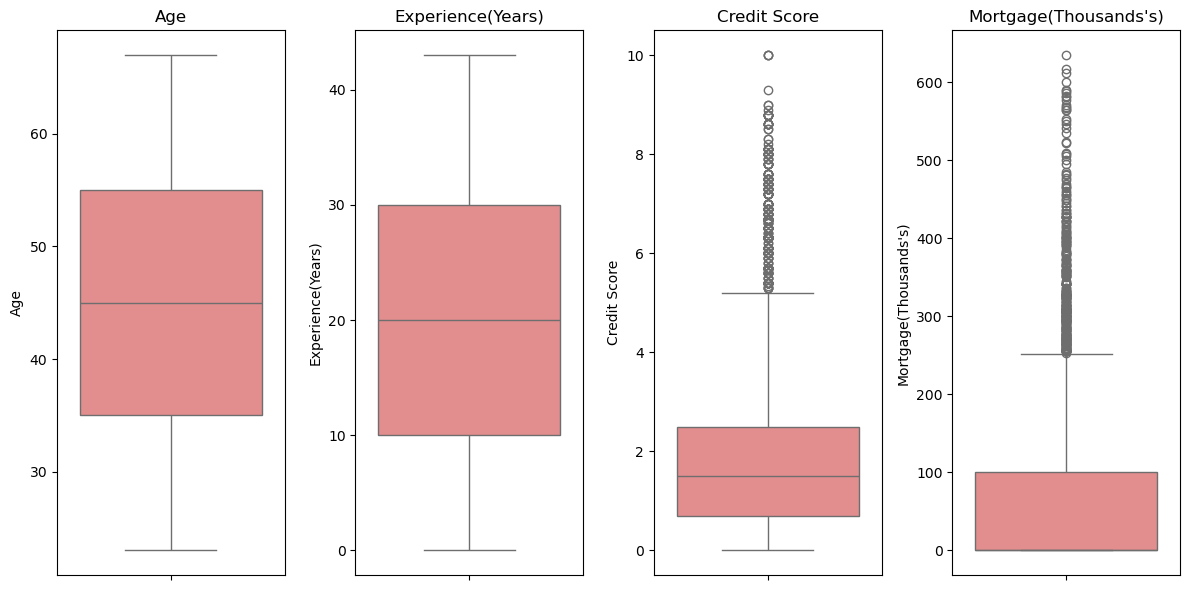

In [28]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()


#### Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

# Redefine target column (if not already done after outlier removal)
target = "Income(Thousands's)"
X = df.drop(target, axis=1)
y = df[target]

# Perform 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 12)
X_test shape: (1000, 12)
y_train shape: (4000,)
y_test shape: (1000,)


The dataset was split into training and testing sets:
- `X_train` and `y_train` contain 80% of the data used to train the model.
- `X_test` and `y_test` contain the remaining 20% used for evaluating the model's performance on unseen data.


#### Feature Scaling with RobustScaler


In [30]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (4000, 12)
X_test_scaled shape: (1000, 12)


I applied RobustScaler to scale the input features prior to model training. Unlike StandardScaler, which relies on the mean and standard deviation, RobustScaler uses the median and interquartile range (IQR). This approach makes it more robust to the influence of outliers.
This choice was particularly appropriate for this dataset because some mild outliers were retained during preprocessing. By using the median and IQR, RobustScaler ensures that the scaling process is not heavily influenced by these extreme values.
Applying this scaler helps improve the stability of the Linear Regression model by reducing the impact of outliers on coefficient estimation. It also supports the convergence of the Neural Network model by maintaining numerical consistency during training.